Osnabrück University - Computer Vision (Winter Term 2022/23) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack

# Exercise Sheet 08: Fourier Transform

## Introduction

This week's sheet should be solved and handed in before the end of **Sunday, January 15, 2023**. If you need help (and Google and other resources were not enough), consult the StudIP forum. Please upload your results to your group's Stud.IP folder.

## Assignment 1: Understanding Fourier Transform (7 points)

This exercise aims at getting some intuition of finite, 2d-Fourier transform.

*Hint:* Python and numpy can deal with complex numbers: `np.real()` and `np.imag()` provide the real and imaginary parts. `np.abs()` and `np.angle()` provide amplitude and phase. `np.conj()` gives the complex conjugate.

**a)** Transform the image `dolly.png` into the frequency space (you may use the function
`numpy.fft.fft2`). The result will be a complex matrix. Plot histograms for the amplitude and phase
values. You may take the logarithm of the amplitude to enhance contrast.

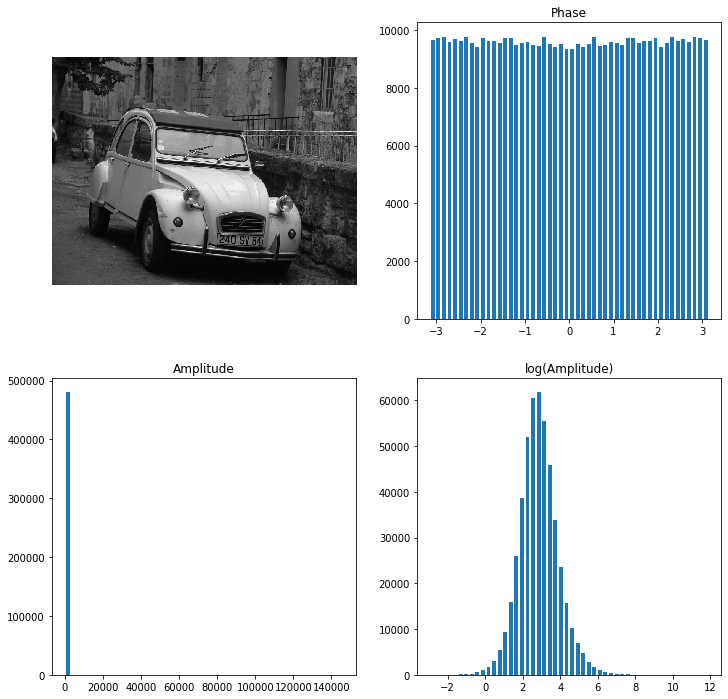

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('images/dolly.png')


# BEGIN SOLUTION
def histogram(x):
    """Computes and plots histogram of image
    
    Args:
        x (ndarray): Input image.
        
    Returns:
    
    """
    
    hist, bins = np.histogram(x, bins=50)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.bar(center, hist, align='center', width=width)


# Perform (fast) Fourier transform.
ft = np.fft.fft2(img)

# Get amplitude and phase.
amplitude = np.abs(ft)
phase = np.angle(ft)

plt.figure(figsize=(12, 12))

plt.gray()
plt.subplot(2, 2, 1)
plt.axis('off')
plt.imshow(img)
# Plot histograms.
plt.subplot(2, 2, 3)
histogram(amplitude)
plt.title('Amplitude')
plt.subplot(2, 2, 4)
histogram(np.log(amplitude))
plt.title('log(Amplitude)')
plt.subplot(2, 2, 2)
histogram(phase)
plt.title('Phase')
# END SOLUTION
plt.show()

**b)** Display the amplitude and phase in separate images. You may again take the logarithm of
the amplitude to enhance the contrast. You may also center the base frequency (see function `numpy.fft.fftshift`). Compare your results with CV-09, slide 33.

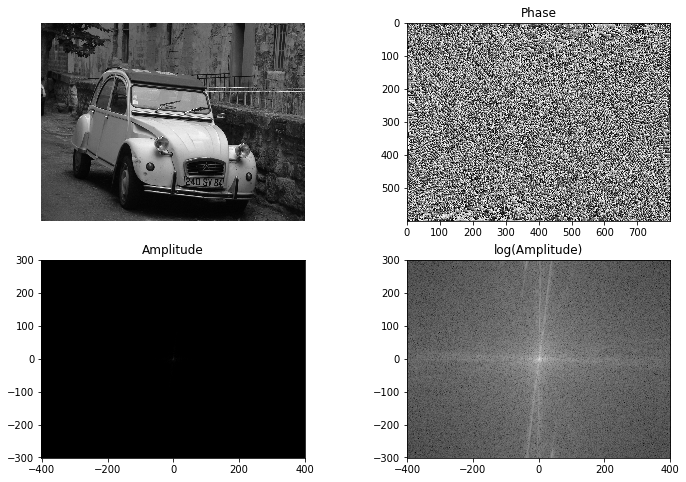

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('images/dolly.png')

# BEGIN SOLUTION
# Perform (fast) Fourier transform
ft = np.fft.fft2(img)

# Get amplitude and phase
#ft = np.fft.fftshift(ft)
amplitude = np.abs(ft)
phase = np.angle(ft)

plt.figure(figsize=(12, 8))

extent = [-(img.shape[1]+1)//2,img.shape[1]//2,
          -(img.shape[0]+1)//2,img.shape[0]//2]
plt.gray()
plt.subplot(2, 2, 1)
plt.axis('off')
plt.imshow(img)
plt.subplot(2, 2, 3)
plt.imshow(np.fft.fftshift(amplitude), extent=extent)
plt.title('Amplitude')
plt.subplot(2, 2, 4)
plt.imshow(np.log(np.fft.fftshift(amplitude)), extent=extent)
plt.title('log(Amplitude)')
plt.subplot(2, 2, 2)
plt.imshow(phase)
plt.title('Phase')
plt.show()
# END SOLUTION

**c)** Transform the image back from the frequency space to the image space (again using `fft2`).
What do you observe? Explain and repair the result.

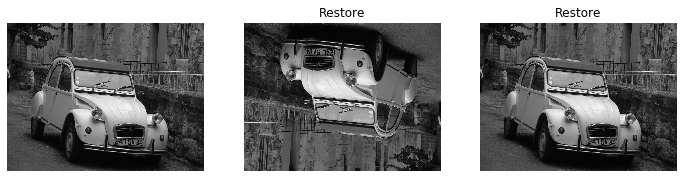

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('images/dolly.png')

# BEGIN SOLUTION

# Perform (fast) Fourier transform
ft = np.fft.fft2(img)

restore = np.abs(np.fft.fft2(ft))
restore2 = np.abs(np.fft.fft2(np.conj(ft)))

plt.figure(figsize=(12, 4))
plt.gray()
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(img)
plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(restore)
plt.title('Restore')
plt.subplot(1, 3, 3)
plt.axis('off')
plt.imshow(restore2)
plt.title('Restore')
# END SOLUTION

plt.show()

Explanation.

**d)** Now restore the image, but only keep the amplitude and vary the phase. Try fixed phase
values (0, $\pi/2$,. . . ), a random phase matrix, or a noisy version of the original phase values.

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('images/dollySquared.jpg')

# BEGIN SOLUTION
# Perform (fast) Fourier transform
ft = np.fft.fft2(img)

# Get amplitude and phase
amplitude = np.abs(ft)
phase = np.angle(ft)

ft2 = amplitude * np.exp(1j * phase + 100)
ft3 = amplitude * np.exp(1j * np.pi/2)
ft4 = amplitude * np.exp(1j * np.random.rand(*phase.shape) * 2*np.pi)
ft5 = amplitude * np.exp(1j * phase + np.random.rand(*phase.shape) * 3.1)

dx = 200
dy = 50
ft6 = np.zeros_like(ft)
# Assumption: Image is square.
for (u, v), val in np.ndenumerate(ft):
        ft6[u, v] = val * np.exp(-1j * 2 * np.pi / ft.shape[0] * (u * dy + v * dx))

restore2 = np.abs(np.fft.ifft2(ft2))
restore3 = np.abs(np.fft.ifft2(ft3))
restore4 = np.abs(np.fft.ifft2(ft4))
restore5 = np.abs(np.fft.ifft2(ft5))
restore6 = np.abs(np.fft.ifft2(ft6))

plt.figure(figsize=(12, 8))
plt.gray()
plt.subplot(2, 3, 1); plt.axis('off'); plt.imshow(img); plt.title('Original')
plt.subplot(2, 3, 2); plt.axis('off'); plt.imshow(restore2); plt.title('Reconstruction')
plt.subplot(2, 3, 3); plt.axis('off'); plt.imshow(restore3); plt.title('Phase = const')
plt.subplot(2, 3, 4); plt.axis('off'); plt.imshow(restore4); plt.title('Random (uniform) values')
plt.subplot(2, 3, 5); plt.axis('off'); plt.imshow(restore5); plt.title('Phase + noise')
plt.subplot(2, 3, 6); plt.axis('off'); plt.imshow(restore6); plt.title('Translation')
plt.show()
# END SOLUTION

FileNotFoundError: [Errno 2] No such file or directory: 'images/dolly.jpg'

**e)** We do the same, but now we keep the phase while varying the amplitude values, i.e. constant,
amplitude, randomly distributed amplitudes and noisy versions of the the original values.

Explain the results!


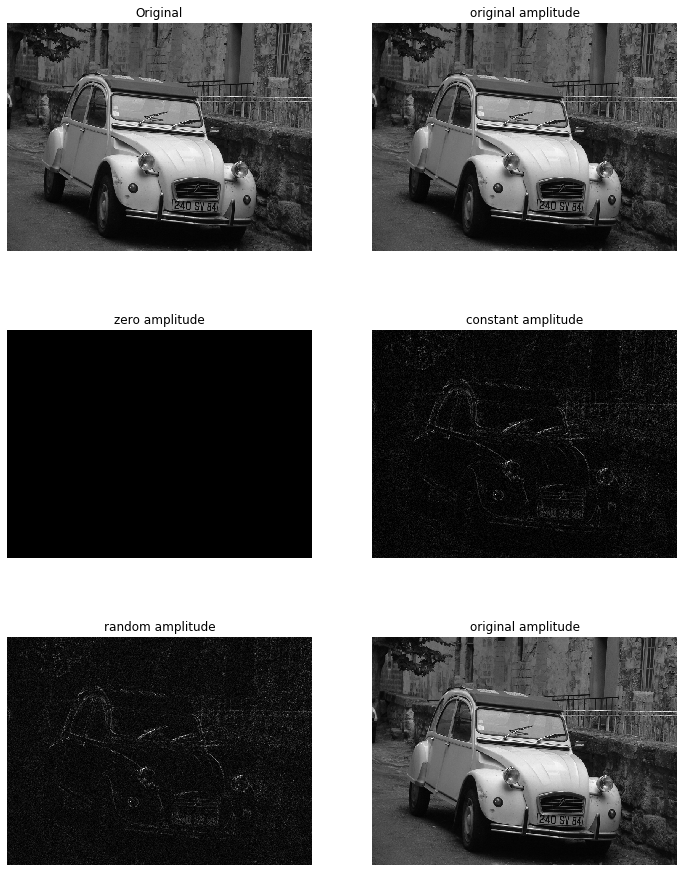

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('images/dolly.png')

# Perform (fast) Fourier transform
ft = np.fft.fft2(img)

# Get amplitude and phase
amplitude = np.abs(ft)
phase = np.angle(ft)

amplitudes = []
amplitudes.append((amplitude, "original amplitude"))
amplitudes.append((np.zeros(amplitude.shape), "zero amplitude"))
amplitudes.append((np.ones(amplitude.shape)*amplitude.max(), "constant amplitude"))
amplitudes.append((np.random.rand(*amplitude.shape), "random amplitude"))
amplitudes.append((amplitude, "original amplitude"))

plt.figure(figsize=(12, 16)); plt.gray()
plt.subplot(3, 2, 1); plt.axis('off'); plt.imshow(img); plt.title('Original')

for i, (amp, tit) in enumerate(amplitudes):
    ft0 = amp * np.exp(1j * phase)
    img0 = np.abs(np.fft.ifft2(ft0))
    plt.subplot(3, 2, 2+i); plt.axis('off'); plt.title(tit)
    plt.imshow(img0)

plt.show()

## Assignment 2: Implementing Fourier Transform (6 points)

**a)** 
Explain in your own words the idea of Fourier transform. What is the frequency space? What does a point in that space represent?

Fourier transform decomposes a function into frequencies. It can be considered as a (linear) transformation, mapping from the pixel space into the frequency space. The frequency space has a basis consisting of harmonics of different frequency. A point in the frequency corresponds to one such basis element (sine function).

**b)** First implement a one-dimensional discrete version of Fourier transform, i.e. use the formula
$$ c_n = \sum_{x=0}^{L-1} f(x)\cdot e^{-\tfrac{2\pi i\cdot n}{L}\cdot x} \qquad \text{for $n=0,\ldots,L-1$}$$
for complex valued coefficients.

Plot the graph and the results of your Fourier transform, using the Matplotlib function `plot()`, for different functions. Compare your results with the output of the function `numpy.fft.fft`.

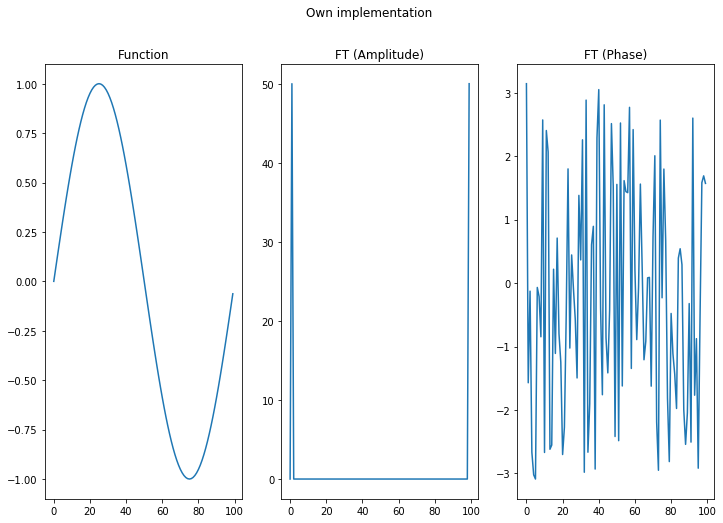

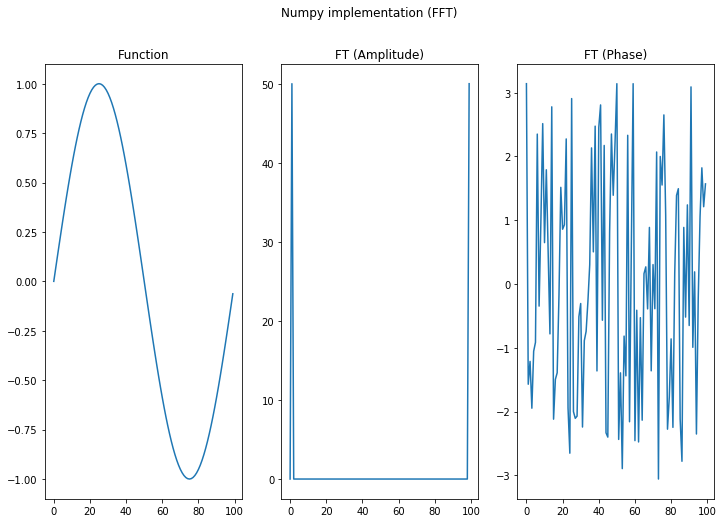

In [7]:
%matplotlib inline
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt


def fourier1d(func):
    """
    Perform a discrete 1D Fourier transform.
    
    Args:
        func (ndarray): 1-D array containing the function values.
    
    Returns:
        ndarray (complex): The Fourier transformed function.
    """
    ft = np.zeros(func.shape, dtype=complex)

    # BEGIN SOLUTION
    L = func.size
    n = np.arange(L)
    k = n[:, None] # Reshape to column vector.
    M = np.exp(-2j * np.pi * k * n / L)
    ft = M @ func
    # END SOLUTION

    return ft


# number of points
L = np.arange(100)


def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))


func = np.sin(2 * np.pi * L / len(L))
#func = np.zeros(L.shape)
#func[40:60] = 1
#func = gaussian(L, 0, 10)

# Own implementation.
ft = fourier1d(func)
plt.figure(figsize=(12, 8))
plt.suptitle('Own implementation');
plt.subplot(1, 3, 1); plt.plot(L, func); plt.title('Function')
plt.subplot(1, 3, 2); plt.plot(L, np.abs(ft)); plt.title('FT (Amplitude)')
plt.subplot(1, 3, 3); plt.plot(L, np.angle(ft)); plt.title('FT (Phase)')
plt.show()

# Numpy implementation.
ft = np.fft.fft(func)

plt.figure(figsize=(12, 8))
plt.suptitle('Numpy implementation (FFT)')
plt.subplot(1, 3, 1); plt.plot(L, func); plt.title('Function')
plt.subplot(1, 3, 2); plt.plot(L, np.abs(ft)); plt.title('FT (Amplitude)')
plt.subplot(1, 3, 3); plt.plot(L, np.angle(ft)); plt.title('FT (Phase)')
plt.show()

**c)** Now implement a 2-dimensional version of Fourier transform for images, using the formula from the lecture. Compare your result with the output of `fft2`.

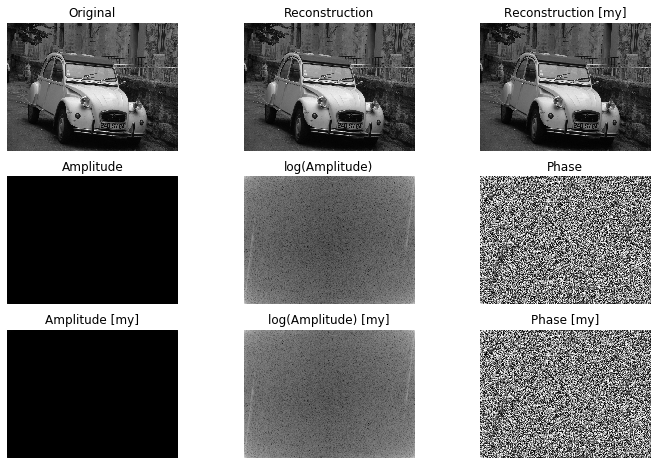

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


def fourier2d(img):
    """
    Perform discrete 2D Fourier transform of a given image.
    
    Args:
        img (ndarray): Input image.
        
    Returns:
    
    """

    ft = np.zeros(img.shape)

    # BEGIN SOLUTION

    M, N = img.shape

    # we first compute e^{-i 2pi (i/M)} for i=0,...,M-1 (and same for N)
    e_M = np.exp(np.linspace(0, -1j * 2 * np.pi, M))
    e_N = np.exp(np.linspace(0, -1j * 2 * np.pi, N))

    # now compute indices. Idea: e_M[idx_M] shall become a (M,M) matrix
    # with e^{-i 2pi (i/M + j/M)} at position [i,j]. (and same for N)
    idx_M = np.mod(np.arange(M).reshape((M, 1)) @ np.arange(M).reshape((1, M)), M)
    idx_N = np.mod(np.arange(N).reshape((N, 1)) @ np.arange(N).reshape((1, N)), N)
    # Now use separability: first do a vertical transform (tmp = e_M[idx_M]@ img)
    # and then a horizontal transform (ft = tmp @ e_N[idx_N])
    ft = e_M[idx_M] @ img @ e_N[idx_N]
    
    # END SOLUTION

    return ft


# Now (visually) compare your results with np.fft.fft2
img = plt.imread('images/dolly.png')

# BEGIN SOLUTION

# Perform (fast) Fourier transform
ft = np.fft.fft2(img)
amplitude = np.abs(ft)
phase = np.angle(ft)
restore = np.abs(np.fft.fft2(np.conj(ft)))

my_ft = fourier2d(img)
my_amplitude = np.abs(my_ft)
my_phase = np.angle(my_ft)
my_restore = np.abs(fourier2d(np.conj(my_ft)))

ft_phase = np.cos(phase) + 1j * np.sin(phase)
img_phase = abs(np.fft.fft2(ft_phase))

plt.figure(figsize=(12, 8))

plt.gray()
plt.subplot(3, 3, 1); plt.axis('off'); plt.imshow(img); plt.title('Original')
plt.subplot(3, 3, 2); plt.axis('off'); plt.imshow(restore); plt.title('Reconstruction')
plt.subplot(3, 3, 3); plt.axis('off'); plt.imshow(my_restore); plt.title('Reconstruction [my]')

plt.subplot(3, 3, 4); plt.axis('off'); plt.imshow(amplitude); plt.title('Amplitude')
plt.subplot(3, 3, 5); plt.axis('off'); plt.imshow(np.log(amplitude)); plt.title('log(Amplitude)')
plt.subplot(3, 3, 6); plt.axis('off'); plt.imshow(phase); plt.title('Phase')

plt.subplot(3, 3, 7); plt.axis('off'); plt.imshow(my_amplitude); plt.title('Amplitude [my]')
plt.subplot(3, 3, 8); plt.axis('off'); plt.imshow(np.log(my_amplitude)); plt.title('log(Amplitude) [my]')
plt.subplot(3, 3, 9); plt.axis('off'); plt.imshow(my_phase); plt.title('Phase [my]')

# END SOLUTION

plt.show()

## Assignment 3: Convolution theorem (7 points)

**a)** What does the convolution theorem state and what are its practical consequences?

Convolution in pixel space is just a complex multiplication in fourier space. This can dramatically reduce the runtime of convolution, especially when applying multiple filters.

**b)**
When introducing convolution, we have discussed different methods to deal with boundary pixels. From the perspective of Fourier analysis, what is the natural way to deal with this problem?

Periodically expand the image.

**c)** What is the complexity for computing a convolution using the convolution theorem? Compare this with your complexity results from sheet 01, Assignment 1(c).


For a $N \times N$ image complexity using convolution theorem is

$$O(N^2\log_2 N)$$

composed of the complexety of transformation into and out of frequency domain ($O(N^2\log_2 N)$) and the complexity of the multiplication ($O(N^2)$).

Convolution in the spacial domain has the complexity of

$$O(n^2 \cdot N^2)$$

for a $(n \times n)$ kernel. ($O(n^2)$ per pixel for each of the $N^2$ pixels.)

**d)** Proof the convolution theorem.

For the proof we will make two assumptions:
1. The kernel $h$ has the same size as the image $f$: $M\times N$. We can always achieve this by simply filling all positions outside the "real" kernel with zeros. This will not affect the outcome of the convolution operation.
1. The image $f$ is periodically continued, i.e., $f(x,y) = f(x+i\cdot M,y+j\cdot N)$ for all $i,j\in\mathbb{Z}$. Same for the kernel. This allows to index the kernel with indices from $\{0,\ldots,M-1\}\times\{0,\ldots,N-1\}$.

With these assumptions, we can compute the convolution operation as
$$(f\ast h)(x,y) = \sum_{i=0}^{M-1}\sum_{j=0}^{N-1} f(x-i,y-j)\cdot h(i,j)$$
Notice, that we use the "original" version of convolution, with a flipped kernel (otherwise the convolution theorem would insert a minus sign, check below!)

Now we can simply spell out the definitions:
\begin{align*}
\mathcal{F}[f\ast h](u,v)
&= \sum_{x=0}^{M-1}\sum_{y=0}^{N-1}[f\ast h](x,y)\cdot e^{-\operatorname{i}2\pi(u\frac{x}{M}+v\frac{y}{N})} \\
&= \sum_{x=0}^{M-1}\sum_{y=0}^{N-1}\left[\sum_{i=0}^{M-1}\sum_{j=0}^{N-1}f(x-i,y-j)\cdot h(i,j)\right]\cdot e^{-\operatorname{i}2\pi(u\frac{x}{M}+v\frac{y}{N})} \\
&= \sum_{x=0}^{M-1}\sum_{y=0}^{N-1}\sum_{i=0}^{M-1}\sum_{j=0}^{N-1}\left[
f(x-i,y-j)\cdot h(i,j) \cdot e^{-\operatorname{i}2\pi(u\frac{x}{M}+v\frac{y}{N})}\right] \\
&= \sum_{i=0}^{M-1}\sum_{j=0}^{N-1}\sum_{x=0}^{M-1}\sum_{y=0}^{N-1}\left[
f(x-i,y-j)\cdot h(i,j) \cdot e^{-\operatorname{i}2\pi(u\frac{x}{M}+v\frac{y}{N})}\right] \\
\end{align*}
Now substitue $x\mapsto x'+i$ and $y\mapsto y'+j$:
\begin{align*}
\qquad\qquad\qquad\qquad\ldots
&= \sum_{i=0}^{M-1}\sum_{j=0}^{N-1}\sum_{x'=-i}^{M-i-1}\sum_{y'=-j}^{N-j-1}\left[
f(x'+i-i,y'+j-j)\cdot h(i,j) \cdot e^{-\operatorname{i}2\pi(u\frac{x'+i}{M}+v\frac{y'+j}{N})}\right] \\
&= \sum_{i=0}^{M-1}\sum_{j=0}^{N-1}\sum_{x'=-i}^{M-i-1}\sum_{y'=-j}^{N-j-1}\left[
f(x',y')\cdot h(i,j) \cdot e^{-\operatorname{i}2\pi(u\frac{x'}{M}+v\frac{y'}{N})}
\cdot e^{-\operatorname{i}2\pi(u\frac{i}{M}+v\frac{j}{N})}\right] \\
&= \sum_{i=0}^{M-1}\sum_{j=0}^{N-1}\sum_{x'=-i}^{M-i-1}\sum_{y'=-j}^{N-j-1}\left[
f(x',y') \cdot e^{-\operatorname{i}2\pi(u\frac{x'}{M}+v\frac{y'}{N})} \cdot h(i,j)
\cdot e^{-\operatorname{i}2\pi(u\frac{i}{M}+v\frac{j}{N})}\right] \\
&= \sum_{i=0}^{M-1}\sum_{j=0}^{N-1}\left[\sum_{x'=-i}^{M-i-1}\sum_{y'=-j}^{N-j-1}\left[
f(x',y') \cdot e^{-\operatorname{i}2\pi(u\frac{x'}{M}+v\frac{y'}{N})} \right] \cdot h(i,j)
\cdot e^{-\operatorname{i}2\pi(u\frac{i}{M}+v\frac{j}{N})}\right] \\
\end{align*}
Because of the periodicity of $f(x',y') \cdot e^{-\operatorname{i}2\pi(u\frac{x'}{M}+v\frac{y'}{N})}$ we can shift the indices of the inner two sums:
\begin{align*}
\qquad\qquad\qquad\qquad\ldots
&= \sum_{i=0}^{M-1}\sum_{j=0}^{N-1}\left[\sum_{x'=0}^{M-1}\sum_{y'=0}^{N-1}\left[
f(x',y') \cdot e^{-\operatorname{i}2\pi(u\frac{x'}{M}+v\frac{y'}{N})} \right] \cdot h(i,j)
\cdot e^{-\operatorname{i}2\pi(u\frac{i}{M}+v\frac{j}{N})}\right] \\
&= \left[\sum_{x'=0}^{M-1}\sum_{y'=0}^{N-1}
f(x',y') \cdot e^{-\operatorname{i}2\pi(u\frac{x'}{M}+v\frac{y'}{N})}\right] \cdot
\left[\sum_{i=0}^{M-1}\sum_{j=0}^{N-1}h(i,j)
\cdot e^{-\operatorname{i}2\pi(u\frac{i}{M}+v\frac{j}{N})}\right] \\
&= \mathcal{F}[f](u,v)\cdot \mathcal{F}[h](u,v)
\end{align*}